In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras




In [3]:
mist= keras.datasets.mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=mist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

The label is : 5


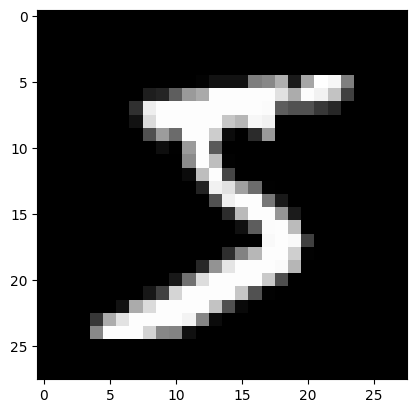

In [7]:
idx=0
img=train_images[idx]
print(f"The label is : {train_labels[idx]}")
plt.gray()
plt.imshow(img)


#Preprocessing


In [8]:

np.min(img),np.max(img)
#for the img we have 28*28 features which they range between 0 to 255  and the above code shows us the range of number these 784 pixels or features are between 0 to 255
#In an 8-bit image format, each pixel is represented by 8 bits (1 byte) of data per color channel.The 8-bit depth means the pixel values can range from
# 0 to 2^8 -1 = 255 A value of 0 typically represents the darkest intensity (black in grayscale images, no color for RGB channels), while 255 represents
#the brightest intensity (white in grayscale images, maximum color in RGB channels)
#The variable img is a NumPy array representing the pixel intensities of the image train_images[idx].
#In a grayscale image, img would be a 2D array where each element represents the intensity of a pixel.
#In an RGB color image, img would be a 3D array where each pixel has three values (one for each of the red, green, and blue color channels).


(0, 255)

In [9]:
train_images=train_images/255.0 #ba in kar maghadir feature haro ke beyne 0 ta 255 hast beyne 0 ta 1 mikonim, yani alan pixel ba addade 255 mosavi 1 hast va pixel ba adade 0
#mosavi 0 hast
test_images=test_images/255.0

#Model Definition


In [10]:
model=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
     keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [12]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history=model.fit(train_images,train_labels,epochs=200,validation_data=(test_images,test_labels))

Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8793 - loss: 0.4125 - val_accuracy: 0.9626 - val_loss: 0.1227
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9697 - loss: 0.0992 - val_accuracy: 0.9657 - val_loss: 0.1064
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9793 - loss: 0.0669 - val_accuracy: 0.9741 - val_loss: 0.0807
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9847 - loss: 0.0463 - val_accuracy: 0.9747 - val_loss: 0.0840
Epoch 5/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9885 - loss: 0.0376 - val_accuracy: 0.9751 - val_loss: 0.0838
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9910 - loss: 0.0282 - val_accuracy: 0.9754 - val_loss: 0.0855
Epoch 7/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9762 - val_loss: 0.0910
Epoch 8/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9927 - loss:

The label is : 6


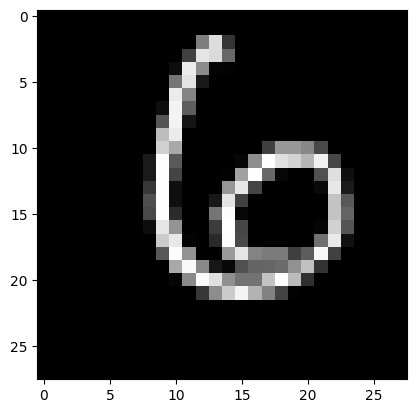

In [16]:
idx=100
img=test_images[idx]
print(f"The label is : {test_labels[idx]}")
plt.gray()
plt.imshow(img)

In [15]:
model.predict(img.reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)